In [1]:
include("dsm.jl")

import dsm
import PyPlot
import DSP

In [2]:
f_s = 1e6;           # sample frequency
T_s = 1/f_s;         # sample time

n_fft = 2^18;        # number of fft points
n_ini = 2^5;         # number of initial points for settling

k = 41;              # input frequency bin
f_i = f_s/n_fft*k;   # input frequency

a_i = .7;            # input amplitude
b_i = 0;             # input offset
n_i = 0;             # input noise power

osr = 256;           # oversampling ratio
f_bw= (f_s/2)/osr;   # noise bandwidth

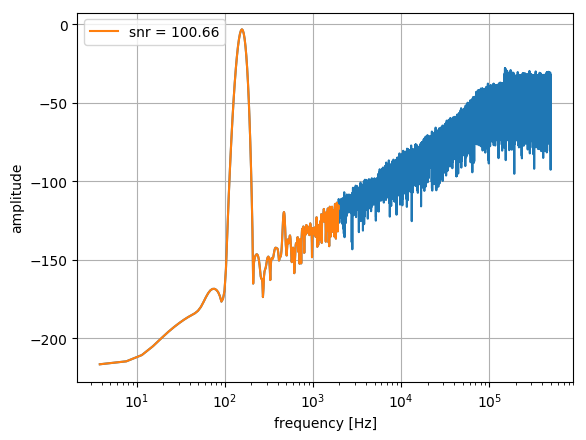

In [3]:
t = 0:T_s:T_s*(n_fft+n_ini-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + n_i*randn(size(t));

mod = dsm.mod_so(1.0, 0.0, 1.0, 0.0, 0.5, 1.0, 0.5);
out = dsm.sim_mod(mod, inp);

q = out.q[end-n_fft+1:end];
q_snr = dsm.snr(q, f_i, f_bw, f_s);

w = DSP.Windows.kaiser(n_fft, 20);
wf = mean(w);
Y_inp = fft(q.*w)/n_fft/wf;

f = linspace(0, f_s/2, (n_fft/2+1));

PyPlot.semilogx(f[2:end], 20*log10.(2*abs.(Y_inp[2:trunc(Int64, n_fft/2+1)])));
PyPlot.hold(true);
PyPlot.semilogx(f[1:trunc(Int64, n_fft/(2*osr))], 20*log10.(2*abs.(Y_inp[1:trunc(Int64, n_fft/(2*osr))])), label=@sprintf("snr = %.2f", q_snr))
PyPlot.hold(false);
PyPlot.xlabel("frequency [Hz]");
PyPlot.ylabel("amplitude");
PyPlot.grid();
PyPlot.legend(loc=2);

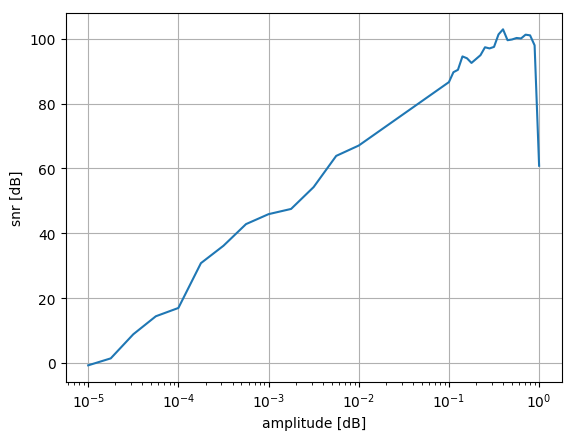

In [4]:
a = vcat(logspace(-5, -2, 13), logspace(-1, 0, 21));

snr = dsm.sim_snr(mod, a);

PyPlot.semilogx(a, snr);
PyPlot.grid(true)
PyPlot.ylabel("snr [dB]");
PyPlot.xlabel("amplitude [dB]");